In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/customers.csv')

In [3]:
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [4]:
df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [5]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb54f27e990>,
      dtype=object)

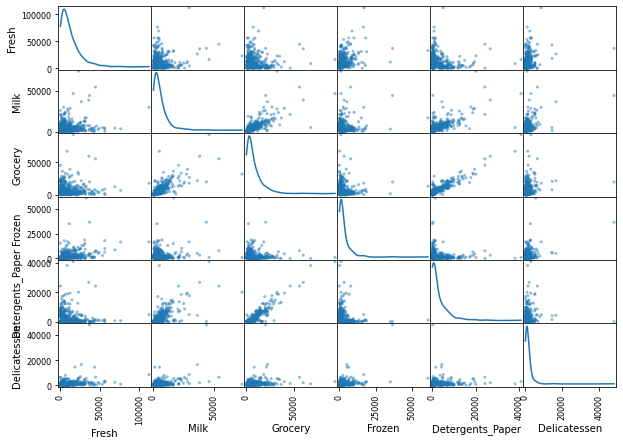

In [6]:
# antes de aplicar o PCA, vou analisar o comportamento das variaveis
# normais ou nao (?)
pd.plotting.scatter_matrix(df, figsize=(10,7), diagonal='kde')

In [7]:
# tentando resolver a assimetria dos dados
import numpy as np
df = np.log(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb54f2f94d0>,
      dtype=object)

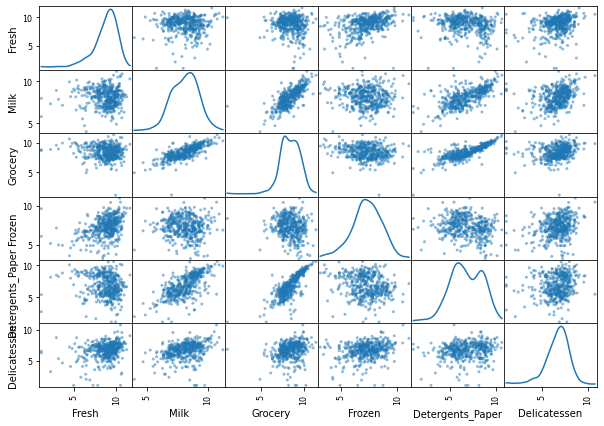

In [8]:
pd.plotting.scatter_matrix(df, figsize=(10,7), diagonal='kde')

In [28]:
# aplicando o PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)

pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# transformando os dados
dados_pca = pca.transform(df)

In [30]:
dados_pca

array([[-1.75098532, -0.07051523, -0.91175896, -1.72653578],
       [-1.80036534, -0.86975357,  0.2128306 ,  0.0079171 ],
       [-1.89373597, -1.67662072,  1.31888515, -0.48520333],
       ...,
       [-3.74793111, -0.92720658, -0.98904036, -0.92761413],
       [ 1.65797167, -0.47603534,  0.56709654, -1.28064478],
       [ 0.73789981,  3.63443815, -1.97053491, -1.12584791]])

In [31]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504


In [32]:
def pca_results(df, pca):
  '''
  Create a DataFrame of the PCA results
  Includes dimension feature weights and explained variance
  Visualizes the PCA results
  '''
  # Dimension indexing
  dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
  # PCA components
  components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
  components.index = dimensions
  # PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
  variance_ratios.index = dimensions
  # Create a bar plot visualization
  fig, ax = plt.subplots(figsize = (14,8))
  # Plot the feature weights as a function of the components
  components.plot(ax = ax, kind = 'bar');
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(dimensions, rotation=0)
  # Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
  # Return a concatenated DataFrame
  return pd.concat([variance_ratios, components], axis = 1)

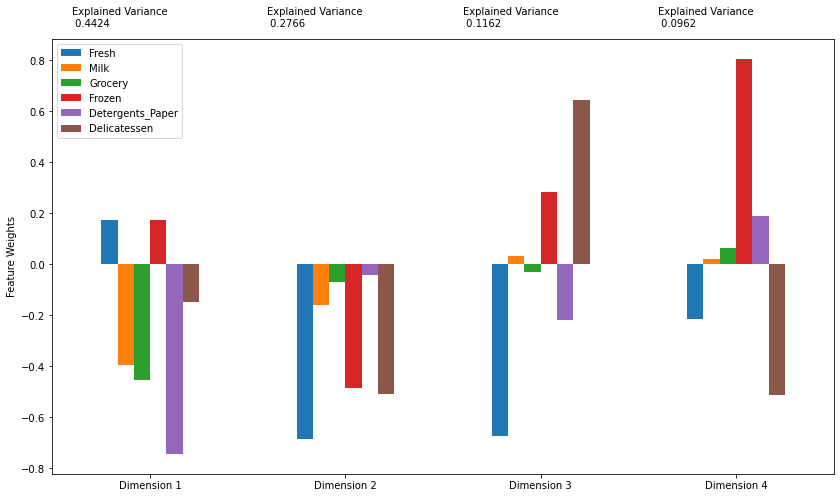

In [33]:
pca_explanation = pca_results(df, pca)

In [34]:
dados_pca

array([[-1.75098532, -0.07051523, -0.91175896, -1.72653578],
       [-1.80036534, -0.86975357,  0.2128306 ,  0.0079171 ],
       [-1.89373597, -1.67662072,  1.31888515, -0.48520333],
       ...,
       [-3.74793111, -0.92720658, -0.98904036, -0.92761413],
       [ 1.65797167, -0.47603534,  0.56709654, -1.28064478],
       [ 0.73789981,  3.63443815, -1.97053491, -1.12584791]])

In [35]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [36]:
pca_explanation['Explained Variance'].cumsum()

Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Name: Explained Variance, dtype: float64

In [ ]:
# Digamos que temos um df_teste
# eu precisaria antes aplicar o PCA nos dados de teste e entao joga-los no modelo
# df_test_PCA = pca.transform(df_teste)
# clf.predict(df_test_PCA)

# NAO POSSO DAR FIT NOVAMENTE!

### T-SNE

In [51]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [52]:
df_mnist = pd.DataFrame(mnist.data)
df_mnist['TARGET'] = mnist.target

In [53]:
df_mnist.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,TARGET
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


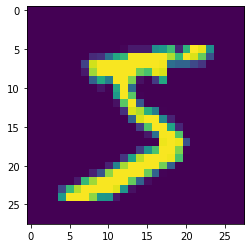

In [54]:
plt.imshow(np.array(df_mnist.drop('TARGET', axis=1).loc[0]).reshape(28,28))

In [55]:
# obtendo apenas uma parte da base de dados
# obtendo apenas 500 instancias
df_mnist = df_mnist.loc[:500]

In [57]:
df_mnist.shape

(501, 785)

In [59]:
X, y = df_mnist.drop('TARGET', axis=1), df_mnist['TARGET']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


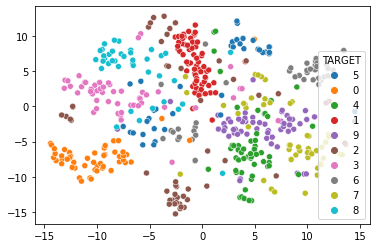

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=80, n_iter=2000)
X_transformado = tsne.fit_transform(X)

# visualizar o resultado
sns.scatterplot(X_transformado[:,0], X_transformado[:,1], hue=y)
plt.show()

In [ ]:
# TSNE NÃO É PARAMÉTRICO, SIGNIFICA QUE NÃO PODEMOS APLICAR 
# ELE A CONJUNTOS DE TREINAMENTO E TESTE!